## Implementation of Perceptron for classification  
### Author: Tuan Le  
### Email: tuanle@hotmail.de

The perceptron is a linear classifier for a binary classification. In this case the target variable $y \in \{-1,+1\}$.   
Suppose we have some input data $\mathbf{x} \in \mathbb{R}^M$ then we need to find a weight vector $\mathbf{w}$ which will encourage our linear mapping $m = \mathbf{w}'\mathbf{x}$.   
Now this $m$ is in the space $\mathbb{R}$. Since our targets are either $+1$ or $-1$ we put our weighted sum $m$ to the $sign(\cdot)$ function, where $sign(m) = -1$ if $m<0$ and $sign(m) = +1$ if $m>1$.  
Hence our perceptron predict the target with: $\hat{y_t} = sign(m_t) = sign(\mathbf{w}'\mathbf{x_t})$  $\forall t = 1,2,...,N$.  
  
The update rule is as follow:

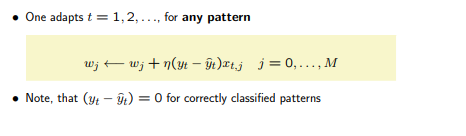

In [1]:
from IPython.display import Image
Image(filename='perceptron_update.png', width=600, height=700) 

In [2]:
#Load all needed libraries:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [3]:
#Define Perceptron class:
class Perceptron(object):
    """
    Perceptron Classifier.
    
    Parameter
    ---------
    eta : float
        Learning rate (between 0.0 and 1.0)
    max_iter : int
        Passes (epochs) over the training set.
    
    Attributes
    ---------
    w : 1d-numpy array
        Weights after fitting.
    eta: float
        Learning rate
    max_iter: int
        maximal number of iterations
    """
    
    ### Constructor: ###
    def __init__(self, eta=0.1, max_iter=1000):
        '''
        Init method for Perceptron.
        
        Parameters
        ----------
        eta : Learning rate
        max_iter : Maximal iteration number
            
        Returns
        -------
        perceptron object : a perceptron object for classification
        '''
        self.eta = eta
        self.max_iter = max_iter
        self.weights = None
        self.inter_weights = []
      
    ### Train method: ###
    def train (self, X, Y):
        '''
        Training method for data.
        
        Parameters
        ----------
        X : Training vectors
        y : Target values
            
        Returns
        -------
        w_ : 1d-array; Weights after fitting.
        '''
        
        #Get sample information
        (n_samples, n_features) = X.shape
        #Initialize random weights element (including bias) \in [0,1] for learning
        self.weights = np.random.rand(n_features+1, 1)
        #Concatenate 1 vector for bias modeling
        X = np.c_[np.ones((n_samples, 1)), X]
        #Compute prediction by applying sign function over weighted sum
        weighted_sum = np.dot(X, self.weights)
        Y_hat = np.sign(weighted_sum)
        #Iterate over training set and apply learning rule:
        for iteration in range(0, self.max_iter):
            #If prediction is correct:break and go to next observation, note here vectors will be compared
            if np.array_equal(Y, Y_hat): ## Vectorized comparison
                break
            #If there are misprediction iterate over full training sample (batch) and ...
            for sample in range(0, n_samples):
                if Y[sample] != Y_hat[sample]: # ... and apply weights learning for misclassified ones
                    self.weights += self.eta * Y[sample] * X[sample][:, np.newaxis]
                    self.inter_weights.append(np.copy(self.weights))
                    Y_hat = np.sign(np.dot(X, self.weights))
        return self.weights

In [4]:
## Generate data function for learning:
def generate_data(n, dim):
    '''
    Generating training data.
        
    Parameters
    ----------
    n : the number of samples 
    dim: number of features.

    Returns
    -------
    X : training vectors
    '''
    #create half of n random numbers being element [-1,0]
    X1 = np.random.rand(n//2, dim) - 1
    #create another half of n random numbers being element [0,1]
    X2 = np.random.rand(n - n//2, dim)
    #row bind the data into one frame
    X = np.r_[X1, X2]
    #create -1 output values for half data to classify
    Y1 = np.zeros((n - n//2, 1)) - 1
    #create 1 output values for rest of half data to classify
    Y2 = np.ones((n//2, 1))
    #rowbind into one single vector
    Y = np.r_[Y1, Y2]
    return X, Y

In [5]:
##Plot functions in two dimensional feature space
def plot2D(X, Y, p):
    '''
    Plots the data points and the separating hyperplane in the two dimensional case
    
    Parameters
    ----------
    X: matrix containing the data points
    Y: label of the data points
    p: instance of trained perceptron model
    '''
    #create plot object
    plt.figure()
    #create scatterplot taking first two dimensions of X-Matrix
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten())
    #save inter_weights objects into variable
    inter_weights = p.inter_weights
    for index, weights in enumerate(inter_weights):
        #slope a
        a = - weights[1] / weights[2]
        #intercept b
        b = - weights[0] / weights[2]
        x = [-1, 1]
        y = [a*e+b for e in x]
        if index == len(inter_weights) - 1:
            plt.plot(x, y, 'r-')
        else:
            plt.plot(x, y, 'b--')
    plt.show()

Printing generated data:
[[-0.24521567 -0.39359859 -1.        ]
 [-0.58552866 -0.73568186 -1.        ]
 [-0.84576659 -0.36917802 -1.        ]
 [-0.60928903 -0.85077912 -1.        ]
 [-0.813321   -0.67766026 -1.        ]
 [-0.70081797 -0.55150954 -1.        ]
 [-0.17467191 -0.29203764 -1.        ]
 [-0.59154859 -0.79120306 -1.        ]
 [-0.30779917 -0.34404221 -1.        ]
 [-0.24444483 -0.37392856 -1.        ]
 [ 0.38246053  0.03766276  1.        ]
 [ 0.01982485  0.85209515  1.        ]
 [ 0.65775541  0.10601468  1.        ]
 [ 0.03397964  0.26326395  1.        ]
 [ 0.82773852  0.79858595  1.        ]
 [ 0.59120362  0.58341271  1.        ]
 [ 0.29704973  0.80930491  1.        ]
 [ 0.99105099  0.2231646   1.        ]
 [ 0.6142065   0.87557346  1.        ]
 [ 0.50310707  0.24332158  1.        ]]


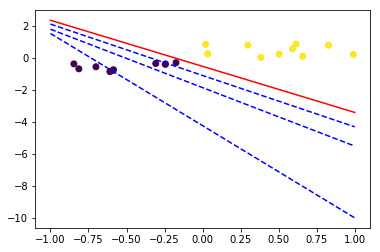

In [6]:
##Apply learning:

#1) generate random data: 20 observations and 2 features 
rnd.seed(123)
X, Y = generate_data(20, 2)
print("Printing generated data:")
print(np.column_stack([X,Y]))

#2) Peceptron:
#a) create object
perceptron = Perceptron()
#b) call method to train on X and Y data
perceptron.train(X, Y)
#c) plot the results
plot2D(X, Y, perceptron)

In [7]:
## END ##